In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deep Learning/Assignment 2/Movie_Reviews.csv")
df.shape

(50000, 2)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [ ]:
print((df.sentiment == 'positive').sum()) # Positive
print((df.sentiment == 'negative').sum()) # Negative

25000
25000


In [ ]:
df['sentiment'] = df.sentiment.replace(to_replace=['positive', 'negative'], value=[1, 0])

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
# Preprocessing
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

def remove_br(text):
  text = text.replace('<br /><br />','')
  return text

In [ ]:
df["review"] = df.review.map(remove_br)
df["review"] = df.review.map(remove_URL)
df["review"] = df.review.map(remove_punct)
df["review"] = df.review.str.lower()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)


nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
# from nltk import word_tokenize,pos_tag

def lemmatization(text):
  lemmatizer = WordNetLemmatizer()
  result = lemmatizer.lemmatize(text)
  return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df["review"] = df.review.map(remove_stopwords)
df["review"] = df.review.map(lemmatization)

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [ ]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.review)

In [ ]:
len(counter)

222591

In [ ]:
counter.most_common(5)

[('movie', 83507),
 ('film', 74462),
 ('one', 50366),
 ('like', 38825),
 ('good', 28483)]

In [ ]:
num_unique_words = len(counter)

In [ ]:
from sklearn.model_selection import train_test_split

train_ratio = 0.7
test_ratio = 0.2
validation_ratio = 0.1

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'],  test_size = 0.3 , random_state = 1, stratify=df['sentiment'])

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = test_ratio/(test_ratio + validation_ratio), random_state = 1, stratify= y_test)

In [ ]:
X_train.shape, y_train.shape
X_test.shape , y_test.shape
X_val.shape , y_val.shape

((5000,), (5000,))

In [ ]:
# Balanced data set
print((y_train == 1).sum()) # Positive
print((y_train == 0).sum()) # Negative

print((y_test == 1).sum()) # Positive
print((y_test == 0).sum()) # Negative

print((y_val == 1).sum()) # Positive
print((y_val == 0).sum()) # Negative

17500
17500
5000
5000
2500
2500


In [ ]:
# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(X_train) # fit only to training

In [ ]:
# each word has unique index
word_index = tokenizer.word_index

In [ ]:
word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'even': 6,
 'would': 7,
 'time': 8,
 'really': 9,
 'see': 10,
 'story': 11,
 'much': 12,
 'well': 13,
 'get': 14,
 'great': 15,
 'bad': 16,
 'people': 17,
 'also': 18,
 'first': 19,
 'dont': 20,
 'made': 21,
 'movies': 22,
 'make': 23,
 'films': 24,
 'way': 25,
 'could': 26,
 'characters': 27,
 'think': 28,
 'watch': 29,
 'many': 30,
 'seen': 31,
 'character': 32,
 'two': 33,
 'never': 34,
 'love': 35,
 'acting': 36,
 'plot': 37,
 'know': 38,
 'little': 39,
 'best': 40,
 'show': 41,
 'ever': 42,
 'life': 43,
 'better': 44,
 'scene': 45,
 'end': 46,
 'still': 47,
 'say': 48,
 'man': 49,
 'scenes': 50,
 'something': 51,
 'go': 52,
 'back': 53,
 'watching': 54,
 'im': 55,
 'real': 56,
 'didnt': 57,
 'thing': 58,
 'doesnt': 59,
 'years': 60,
 'actors': 61,
 'actually': 62,
 'makes': 63,
 'though': 64,
 'funny': 65,
 'nothing': 66,
 'look': 67,
 'going': 68,
 'find': 69,
 'another': 70,
 'new': 71,
 'lot': 72,
 'work': 73,
 'every

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
val_sequences = tokenizer.texts_to_sequences(X_val)

In [ ]:
# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 100

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((35000, 1000), (5000, 1000))

In [ ]:
# Create LSTM model
from tensorflow.keras import layers


model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(512, activation="sigmoid"))
model.add(layers.Dense(256, activation="sigmoid"))
model.add(layers.Dense(128, activation="sigmoid"))
model.add(layers.Dense(64, activation="sigmoid"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 16)          3559184   
                                                                 
 lstm_3 (LSTM)               (None, 64)                20736     
                                                                 
 dense_11 (Dense)            (None, 512)               33280     
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/Deep Learning/Assignment 2/models/RNN/epoch-{epoch:02d}-val_acc-{val_binary_accuracy:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_binary_accuracy',
    save_weights_only=False,
    save_best_only=True,
    save_freq='epoch',
    )

model.compile(optimizer = tf.keras.optimizers.Adam(), # default learning_rate = 0.001
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = tf.keras.metrics.BinaryAccuracy()
              )

In [ ]:
# model = keras.models.load_model('')
history = model.fit(train_padded, y_train, epochs = 10, validation_data=(val_padded, y_val), callbacks = [model_checkpoint_callback] )

Epoch 1/10
1094/1094 [==============================] - 524s 477ms/step - loss: 0.6943 - binary_accuracy: 0.4999 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 2/10
1094/1094 [==============================] - 520s 475ms/step - loss: 0.6939 - binary_accuracy: 0.4939 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 3/10
1094/1094 [==============================] - 520s 475ms/step - loss: 0.6937 - binary_accuracy: 0.5010 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 4/10
1094/1094 [==============================] - 505s 462ms/step - loss: 0.6937 - binary_accuracy: 0.5021 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/10
1094/1094 [==============================] - 508s 464ms/step - loss: 0.6937 - binary_accuracy: 0.4967 - val_loss: 0.6933 - val_binary_accuracy: 0.5000
Epoch 6/10
1094/1094 [==============================] - 506s 462ms/step - loss: 0.6936 - binary_accuracy: 0.4983 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 7/10
1094/1094 [======

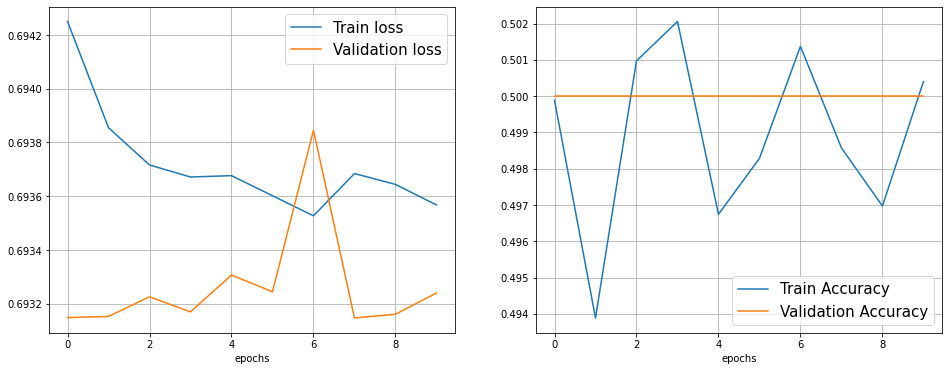

In [ ]:
# plot loss and acc
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('epochs')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('epochs')
plt.grid()
plt.legend(fontsize=15)

In [ ]:
acc, loss = model.evaluate(test_padded, y_test)
print('Model Accuracy: {:5.2f}%'.format(100 * acc))
print('Model Loss: ', loss)

313/313 [==============================] - 29s 93ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Model Accuracy: 69.32%
Model Loss:  0.5


In [ ]:
predictions = model.predict(test_padded)
y_pred = [1 if p > 0.5 else 0 for p in predictions]

313/313 [==============================] - 29s 91ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, 'Truth')

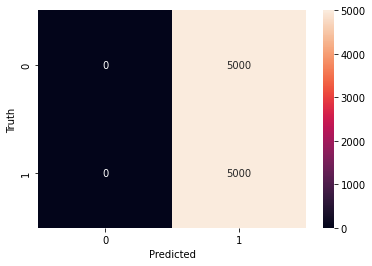

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.50      1.00      0.67      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
